<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/DataWindowingforTimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
uploaded = files.upload()

Saving InformatikaUPR.xlsx to InformatikaUPR.xlsx


In [ ]:
df = pd.read_excel('InformatikaUPR.xlsx')

In [ ]:
print(df.head())

   No.                     Nama           NIM  Tahun Lulus  TAHUN MASUK   JK  \
0    1                 Oktafiani  DBC 113 003       2020.0       2013.0  NaN   
1    2               Zainul Azim  DBC 115 084       2020.0       2015.0  NaN   
2    3                  Martalia  DBC 115 017       2020.0       2015.0  NaN   
3    4          Andrian Darmawan  DBC 113 051       2020.0       2013.0  NaN   
4    5  Febry Aster Yansen Basah  DBC 112 091       2020.0       2012.0  NaN   

   IPS 1  SKS 1  IPS 2  SKS 2  ... ASAL SEKOLAH  BEASISWA  UKT  \
0    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
1    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
2    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
3    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
4    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   

   PEKERJAAN AYAH  PEKERJAAN IBU PENGHASILAN ORANGTUA Unnamed: 21  \
0             NaN            NaN                  NaN

In [ ]:
print(df.dtypes)

No.                       int64
Nama                     object
NIM                      object
Tahun Lulus             float64
TAHUN MASUK             float64
JK                       object
IPS 1                   float64
SKS 1                   float64
IPS 2                   float64
SKS 2                   float64
IPS 3                    object
SKS 3                   float64
IPS 4                   float64
SKS 4                   float64
IPK                     float64
ASAL SEKOLAH             object
BEASISWA                 object
UKT                     float64
PEKERJAAN AYAH           object
PEKERJAAN IBU            object
PENGHASILAN ORANGTUA    float64
Unnamed: 21             float64
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24              object
dtype: object


In [ ]:
selected_columns = ['Tahun Lulus','TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
df_selected = df[selected_columns]

# Menampilkan hasil
print(df_selected)


     Tahun Lulus  TAHUN MASUK  IPS 1  SKS 1  IPS 2  SKS 2 IPS 3  SKS 3  IPS 4  \
0         2020.0       2013.0    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
1         2020.0       2015.0    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
2         2020.0       2015.0    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
3         2020.0       2013.0    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
4         2020.0       2012.0    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
..           ...          ...    ...    ...    ...    ...   ...    ...    ...   
317          NaN          NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
318          NaN          NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
319          NaN          NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
320          NaN          NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   
321          NaN          NaN    NaN    NaN    NaN    NaN   NaN    NaN    NaN   

     SKS 4  IPK  
0      Na

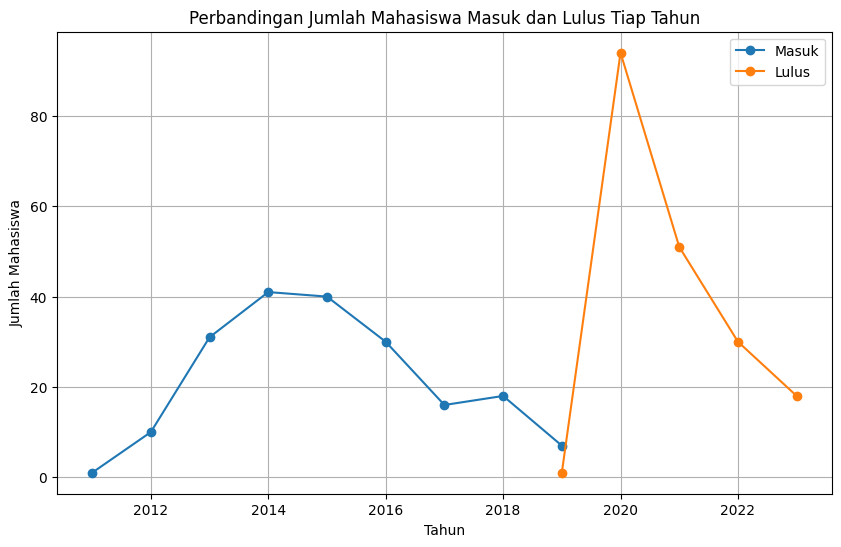

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Menghitung jumlah mahasiswa yang masuk setiap tahun
df_masuk = df.groupby('TAHUN MASUK').size()

# Menghitung jumlah mahasiswa yang lulus setiap tahun
df_lulus = df.groupby('Tahun Lulus').size()

# Membuat plot time series untuk jumlah mahasiswa yang masuk dan lulus
plt.figure(figsize=(10, 6))
plt.plot(df_masuk.index, df_masuk.values, marker='o', linestyle='-', label='Masuk')
plt.plot(df_lulus.index, df_lulus.values, marker='o', linestyle='-', label='Lulus')
plt.title('Perbandingan Jumlah Mahasiswa Masuk dan Lulus Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Hitung durasi studi setiap mahasiswa
df['Durasi Studi'] = df['Tahun Lulus'] - df['TAHUN MASUK']

# Kelompokkan mahasiswa berdasarkan tahun lulus dan hitung jumlah mahasiswa yang lulus setiap tahun
df_lulus = df.groupby('Tahun Lulus').size().reset_index(name='Jumlah Lulus')

# Misalkan kita menggunakan jumlah mahasiswa yang masuk setiap tahun sebagai target prediksi
# Anda mungkin perlu menyesuaikan dengan data yang Anda miliki
df_masuk = df.groupby('TAHUN MASUK').size().reset_index(name='Jumlah Masuk')

future_years = 5

# Membuat array fitur X_masuk dan target y_masuk untuk model regresi linear
X_masuk = df_masuk[['TAHUN MASUK']].values
y_masuk = df_masuk['Jumlah Masuk'].values

# Membuat model regresi linear untuk jumlah mahasiswa yang masuk
model_masuk = LinearRegression()
model_masuk.fit(X_masuk, y_masuk)

# Prediksi untuk tahun-tahun berikutnya
last_year_masuk = df_masuk['TAHUN MASUK'].iloc[-1]
future_years_array_masuk = np.array([last_year_masuk + i for i in range(1, future_years+1)]).reshape(-1, 1)
future_predictions_masuk = model_masuk.predict(future_years_array_masuk)

# Menampilkan hasil prediksi mahasiswa yang masuk
print("Prediksi untuk jumlah mahasiswa yang masuk tahun-tahun berikutnya:")
for year, prediction in zip(future_years_array_masuk.flatten(), future_predictions_masuk):
    print(f"Tahun {year}: {prediction:.0f} mahasiswa masuk")

# Membuat array fitur X_lulus dan target y_lulus untuk model regresi linear
X_lulus = df_lulus[['Tahun Lulus']].values
y_lulus = df_lulus['Jumlah Lulus'].values

# Membuat model regresi linear untuk jumlah mahasiswa yang lulus
model_lulus = LinearRegression()
model_lulus.fit(X_lulus, y_lulus)

# Prediksi untuk tahun-tahun berikutnya
last_year_lulus = df_lulus['Tahun Lulus'].iloc[-1]
future_years_array_lulus = np.array([last_year_lulus + i for i in range(1, future_years+1)]).reshape(-1, 1)
future_predictions_lulus = model_lulus.predict(future_years_array_lulus)

# Menampilkan hasil prediksi mahasiswa yang lulus
print("\nPrediksi untuk jumlah mahasiswa yang lulus tahun-tahun berikutnya:")
for year, prediction in zip(future_years_array_lulus.flatten(), future_predictions_lulus):
    print(f"Tahun {year}: {prediction:.0f} mahasiswa lulus")

Prediksi untuk jumlah mahasiswa yang masuk tahun-tahun berikutnya:
Tahun 2020.0: 22 mahasiswa masuk
Tahun 2021.0: 22 mahasiswa masuk
Tahun 2022.0: 22 mahasiswa masuk
Tahun 2023.0: 22 mahasiswa masuk
Tahun 2024.0: 23 mahasiswa masuk

Prediksi untuk jumlah mahasiswa yang lulus tahun-tahun berikutnya:
Tahun 2024.0: 30 mahasiswa lulus
Tahun 2025.0: 27 mahasiswa lulus
Tahun 2026.0: 24 mahasiswa lulus
Tahun 2027.0: 21 mahasiswa lulus
Tahun 2028.0: 18 mahasiswa lulus


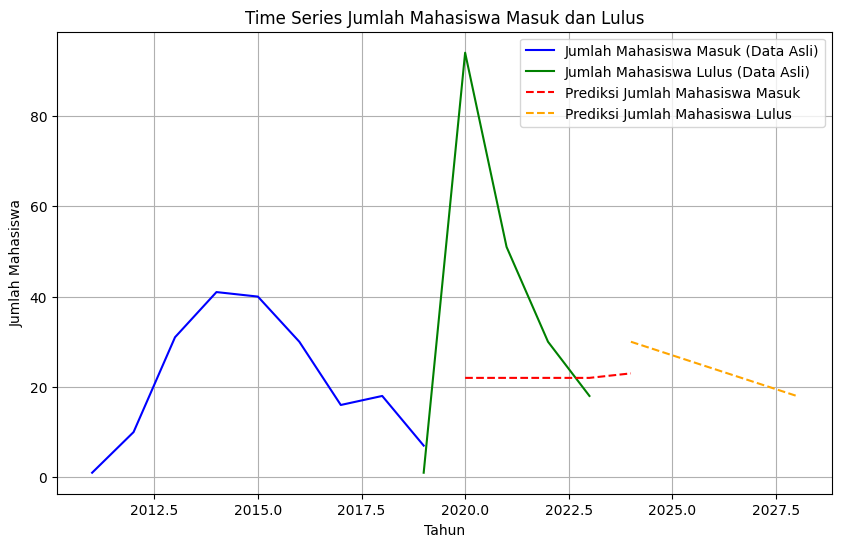

In [ ]:

# Memuat data ke dalam time series
tahun_masuk = df_masuk['TAHUN MASUK']
jumlah_masuk = df_masuk['Jumlah Masuk']
tahun_lulus = df_lulus['Tahun Lulus']
jumlah_lulus = df_lulus['Jumlah Lulus']

# Melakukan prediksi untuk data di masa depan
future_years_masuk = np.arange(last_year_masuk + 1, last_year_masuk + future_years + 1)
future_years_lulus = np.arange(last_year_lulus + 1, last_year_lulus + future_years + 1)
future_predictions_masuk = [22] * 4 + [23]  # Menggunakan hasil prediksi yang Anda berikan
future_predictions_lulus = [30, 27, 24, 21, 18]  # Menggunakan hasil prediksi yang Anda berikan

# Menggambarkan time series data asli dan hasil prediksi
plt.figure(figsize=(10, 6))

# Data asli
plt.plot(tahun_masuk, jumlah_masuk, color='blue', label='Jumlah Mahasiswa Masuk (Data Asli)')
plt.plot(tahun_lulus, jumlah_lulus, color='green', label='Jumlah Mahasiswa Lulus (Data Asli)')

# Hasil prediksi
plt.plot(future_years_masuk, future_predictions_masuk, color='red', linestyle='--', label='Prediksi Jumlah Mahasiswa Masuk')
plt.plot(future_years_lulus, future_predictions_lulus, color='orange', linestyle='--', label='Prediksi Jumlah Mahasiswa Lulus')

plt.title('Time Series Jumlah Mahasiswa Masuk dan Lulus')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()


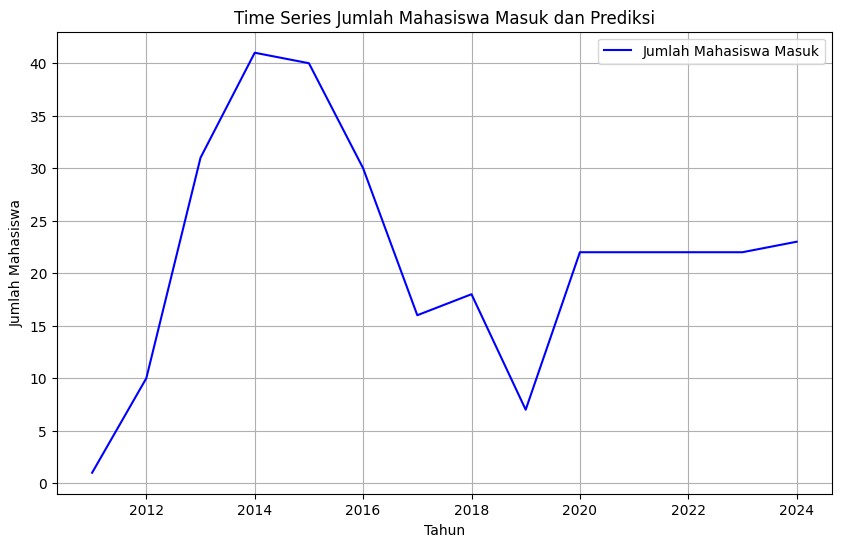

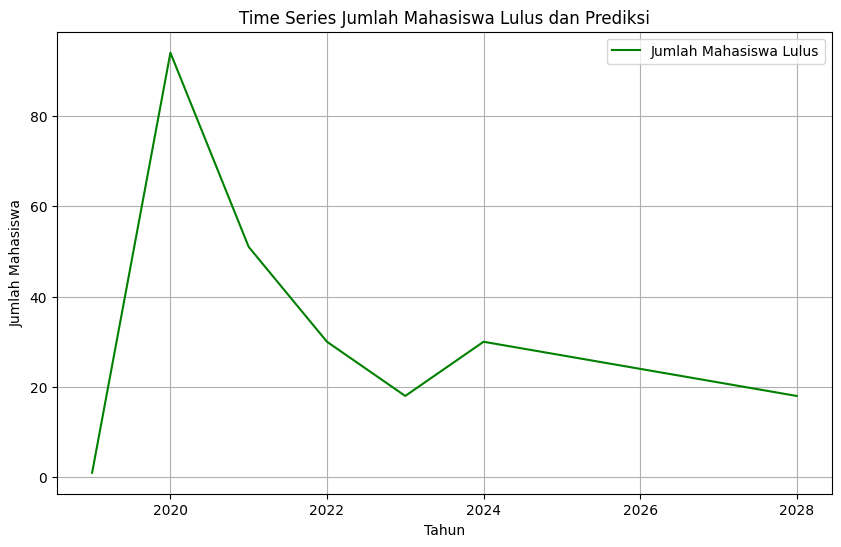

In [ ]:
# Gabungkan data mahasiswa masuk yang sebenarnya dengan hasil prediksi
tahun_masuk_gabungan = np.concatenate((tahun_masuk, future_years_masuk))
jumlah_masuk_gabungan = np.concatenate((jumlah_masuk, future_predictions_masuk))

# Plot time series untuk data gabungan
plt.figure(figsize=(10, 6))

# Data asli dan hasil prediksi digabungkan
plt.plot(tahun_masuk_gabungan, jumlah_masuk_gabungan, color='blue', label='Jumlah Mahasiswa Masuk')

plt.title('Time Series Jumlah Mahasiswa Masuk dan Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()

# Gabungkan data jumlah mahasiswa lulus yang sebenarnya dengan hasil prediksi
tahun_lulus_gabungan = np.concatenate((tahun_lulus, future_years_lulus))
jumlah_lulus_gabungan = np.concatenate((jumlah_lulus, future_predictions_lulus))

# Plot time series untuk data gabungan
plt.figure(figsize=(10, 6))

# Data asli dan hasil prediksi digabungkan
plt.plot(tahun_lulus_gabungan, jumlah_lulus_gabungan, color='green', label='Jumlah Mahasiswa Lulus')

plt.title('Time Series Jumlah Mahasiswa Lulus dan Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()




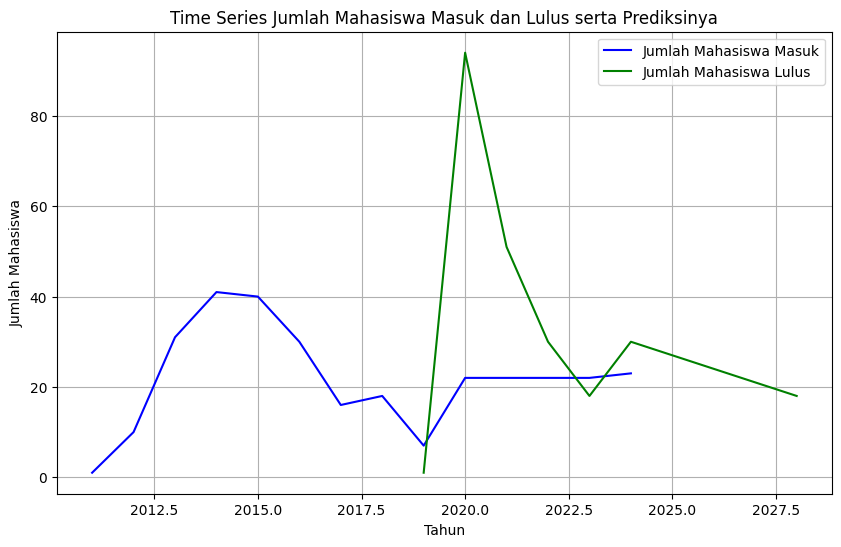

In [ ]:
# Gabungkan data jumlah mahasiswa masuk yang sebenarnya dengan hasil prediksi
tahun_masuk_gabungan = np.concatenate((tahun_masuk, future_years_masuk))
jumlah_masuk_gabungan = np.concatenate((jumlah_masuk, future_predictions_masuk))

# Gabungkan data jumlah mahasiswa lulus yang sebenarnya dengan hasil prediksi
tahun_lulus_gabungan = np.concatenate((tahun_lulus, future_years_lulus))
jumlah_lulus_gabungan = np.concatenate((jumlah_lulus, future_predictions_lulus))

# Plot time series untuk data gabungan
plt.figure(figsize=(10, 6))

# Plot data asli dan hasil prediksi untuk jumlah mahasiswa masuk
plt.plot(tahun_masuk_gabungan, jumlah_masuk_gabungan, color='blue', label='Jumlah Mahasiswa Masuk')

# Plot data asli dan hasil prediksi untuk jumlah mahasiswa lulus
plt.plot(tahun_lulus_gabungan, jumlah_lulus_gabungan, color='green', label='Jumlah Mahasiswa Lulus')

plt.title('Time Series Jumlah Mahasiswa Masuk dan Lulus serta Prediksinya')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Mahasiswa')
plt.legend()
plt.grid(True)
plt.show()